In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

In [2]:
df = pd.read_csv("logs.csv")

In [3]:
print(f"Original Data:\n{df.head()}")

# Drop rows with missing values
df_clean = df.dropna(subset=["speed", "temperature"])
print(f"\nCleaned Data:\n{df_clean.head()}")

Original Data:
         lat         lon  speed  temperature
0 -37.854919  145.119292  15.58        12.98
1 -37.847483  145.118693  42.82        14.30
2 -37.851901  145.114449  28.87        19.50
3 -37.852268  145.116498  62.69        18.91
4 -37.848960  145.114494  18.83        13.59

Cleaned Data:
         lat         lon  speed  temperature
0 -37.854919  145.119292  15.58        12.98
1 -37.847483  145.118693  42.82        14.30
2 -37.851901  145.114449  28.87        19.50
3 -37.852268  145.116498  62.69        18.91
4 -37.848960  145.114494  18.83        13.59


In [5]:
# Step 3: Feature Selection and Target Variable
X = df_clean[["lat", "lon", "speed"]]
y = df_clean["temperature"]

# Step 4: Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Step 5: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Save the trained model
joblib.dump(model, "temperature_model.pkl")
print("Model trained and saved as 'temperature_model.pkl'")

Model trained and saved as 'temperature_model.pkl'


In [8]:
# Step 6: Evaluate the Model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:\nMean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


Model Evaluation:
Mean Absolute Error (MAE): 3.829869694040695
R² Score: -0.0013057788148591598


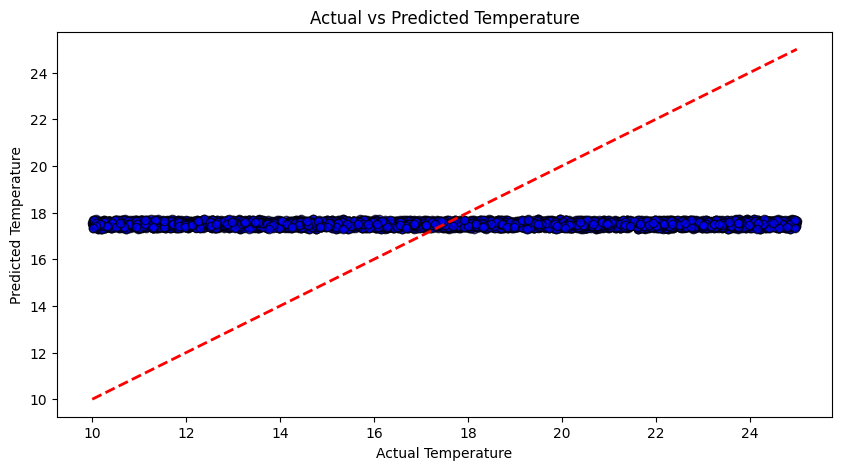

In [10]:

# Step 7: Plot Actual vs. Predicted Temperatures
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color="blue", edgecolors="k", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()

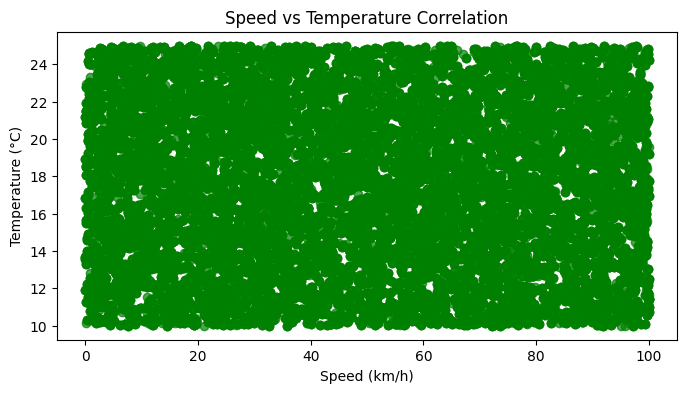

In [11]:
# Step 8: Correlation Analysis - Speed vs Temperature
plt.figure(figsize=(8, 4))
plt.scatter(df_clean["speed"], df_clean["temperature"], color="green", alpha=0.7)
plt.xlabel("Speed (km/h)")
plt.ylabel("Temperature (°C)")
plt.title("Speed vs Temperature Correlation")
plt.show()

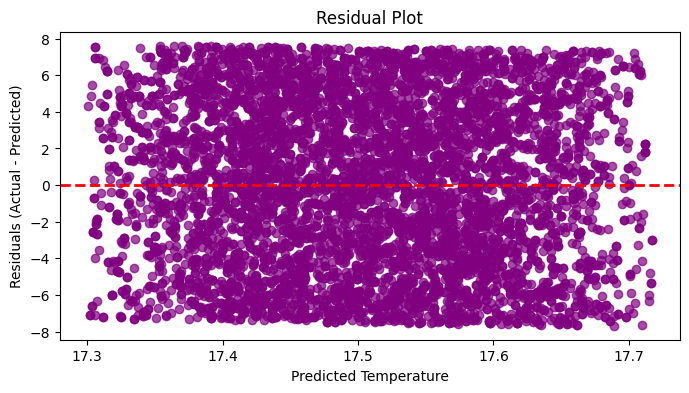

In [14]:

# Step 9: Residual Plot to Check Prediction Errors
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residuals, color="purple", alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel("Predicted Temperature")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()